In [1]:
from fastai import *
from fastai.vision import *
from fastai.vision.gan import *
from fastai.callbacks.hooks import *

import os
print(os.listdir("../input/leaf-disease/Datasets"))

['Virus', 'Normal', 'Bacteria', 'Fungi', 'Nematodes']


In [2]:
img_dir='../input/leaf-disease/Datasets/'
path = Path(img_dir)

In [3]:
data = ImageDataBunch.from_folder(path, 
                                  train=".",
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

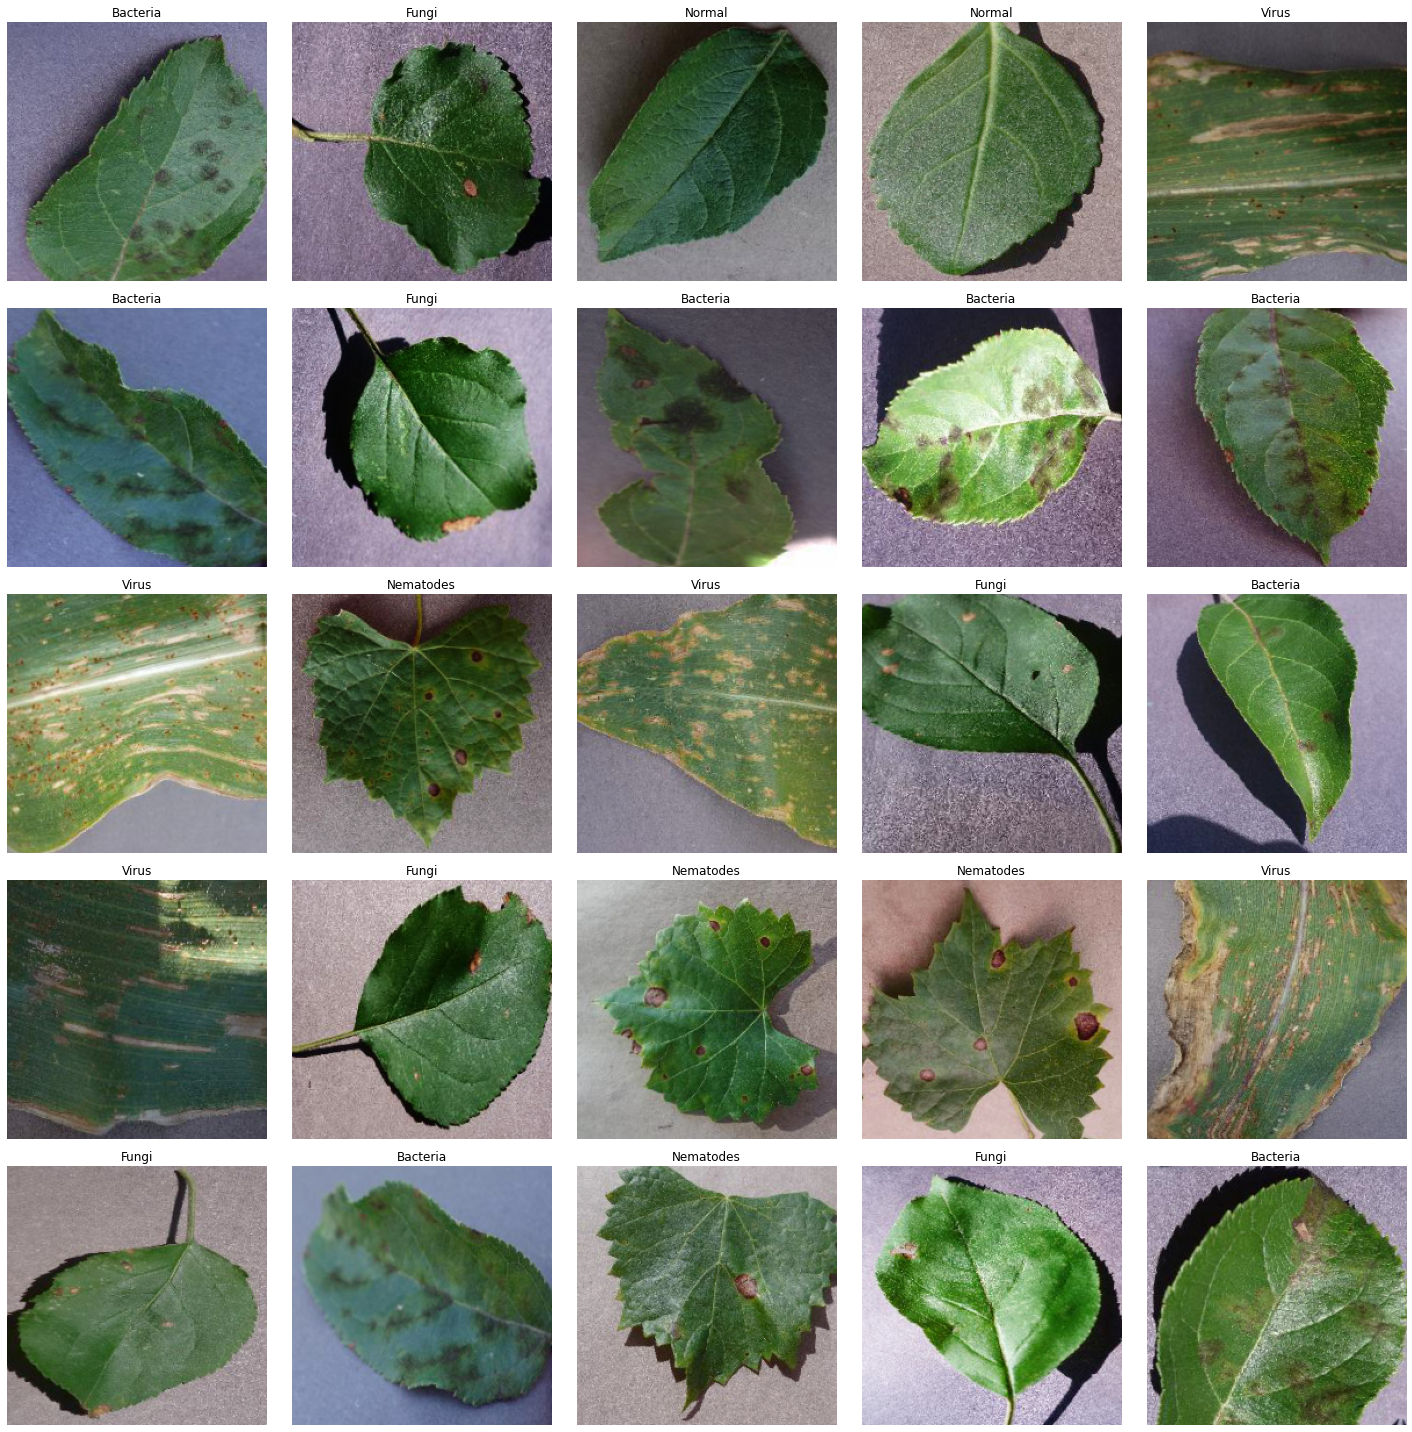

In [4]:
data.show_batch(rows=5)

In [5]:
print(f'Classes: {data.classes}')

Classes: ['Bacteria', 'Fungi', 'Nematodes', 'Normal', 'Virus']


> RESNET50

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate], model_dir="/temp/model/")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


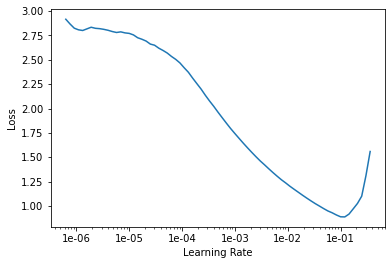

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn_rate = 1e-02
learn.fit_one_cycle(5, slice(learn_rate))

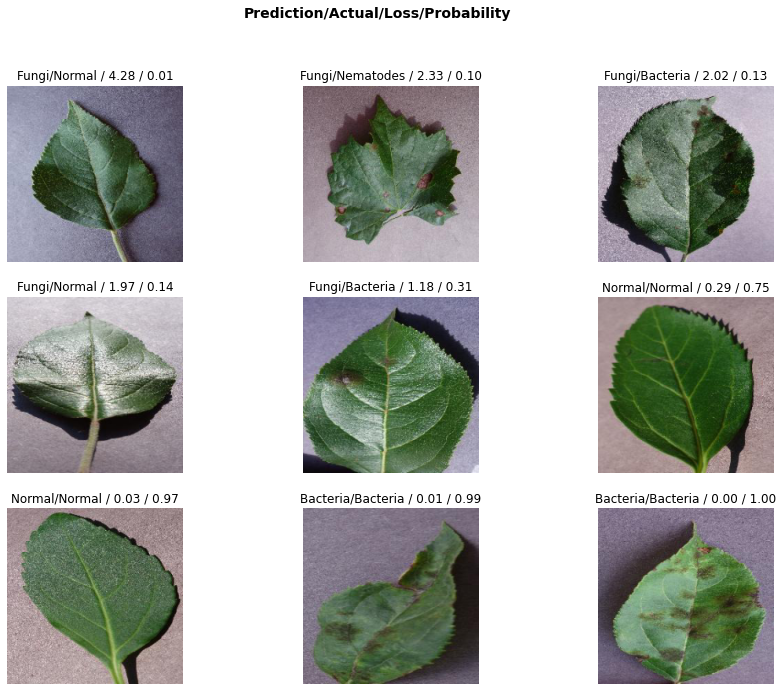

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

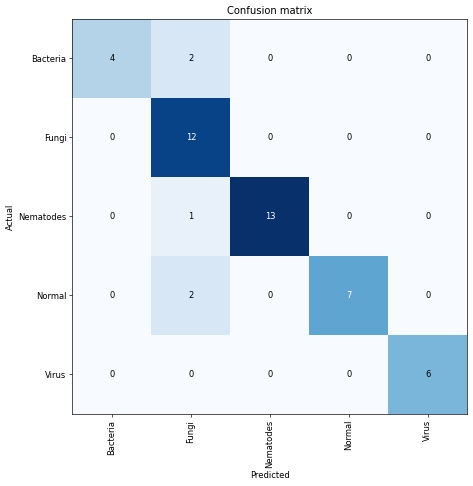

In [10]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [11]:
learn.save('stage-1-rn50')

In [12]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


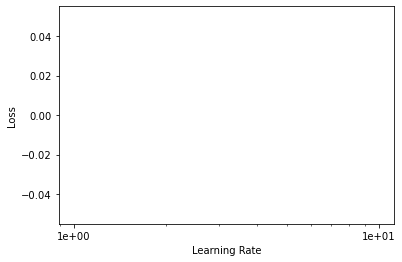

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(5, slice(1e-06, learn_rate/5))

In [15]:
learn.save('stage-2-rn50')

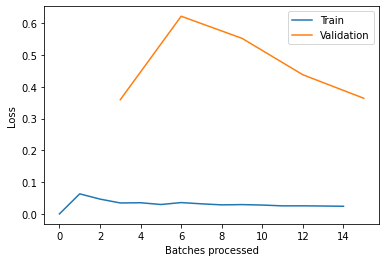

In [16]:
learn.unfreeze()
learn.recorder.plot_losses()

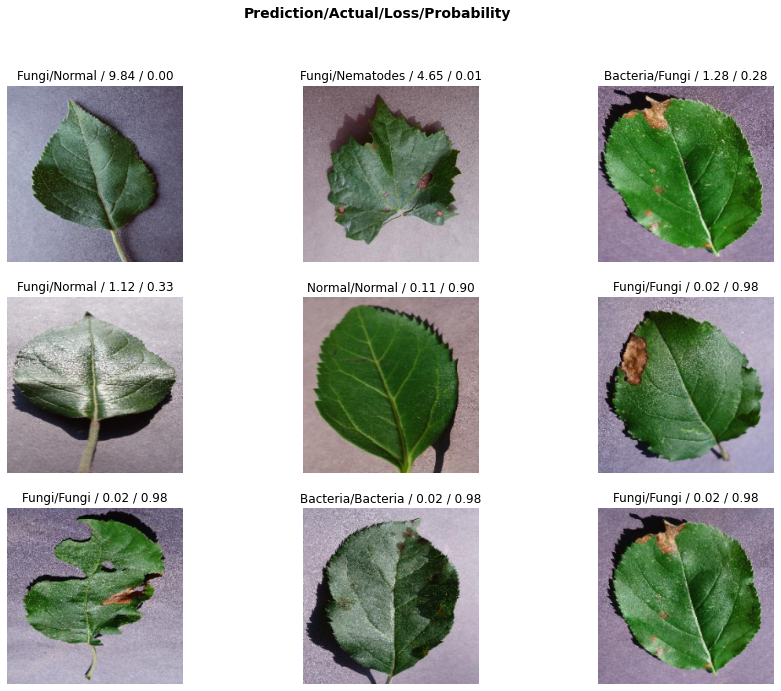

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

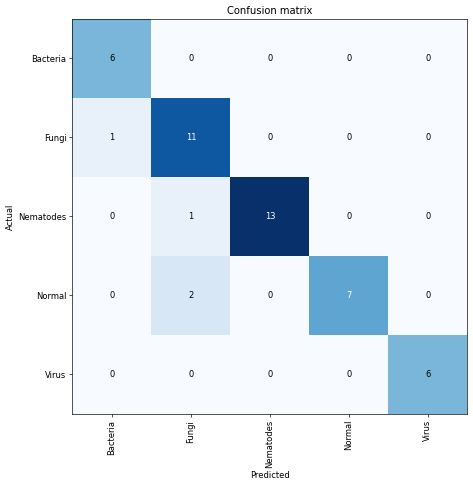

In [18]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

> RESNET34

In [19]:
learn_resnet34 = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate], model_dir="/temp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


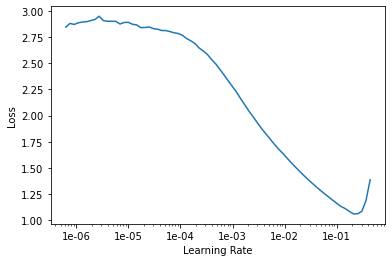

In [20]:
learn_resnet34.lr_find()
learn_resnet34.recorder.plot()

In [21]:
learn_resnet34_rate = 1e-01
learn_resnet34.fit_one_cycle(5, slice(learn_rate))

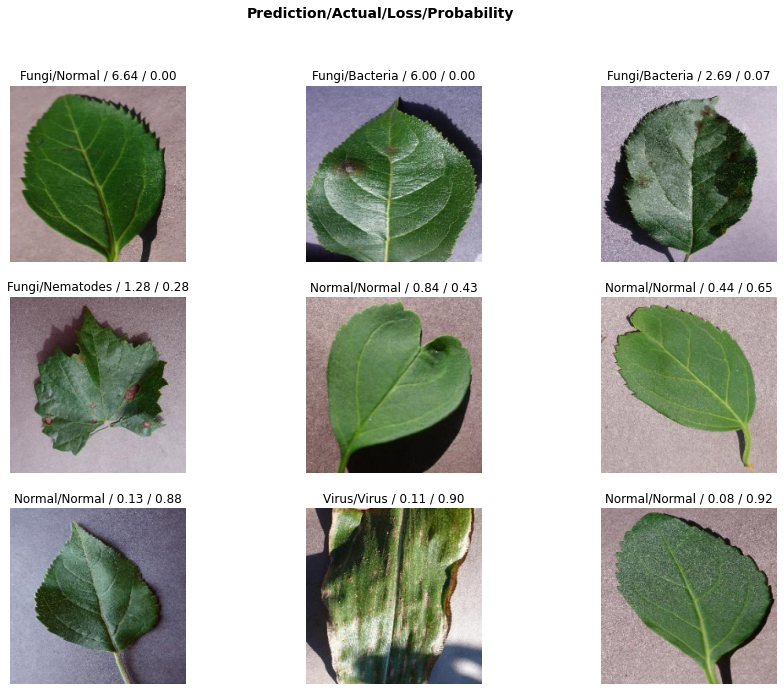

In [22]:
interp = ClassificationInterpretation.from_learner(learn_resnet34)
interp.plot_top_losses(9, figsize=(15,11))

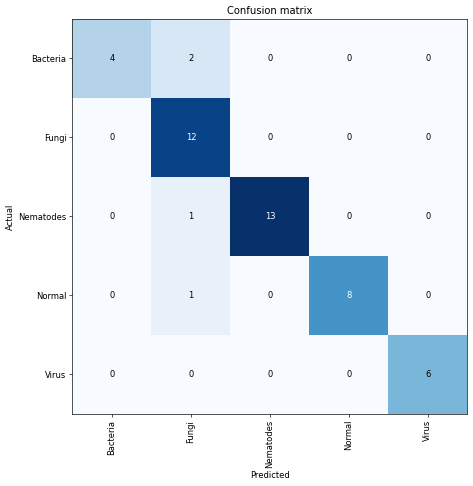

In [23]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [24]:
learn_resnet34.save('stage-1-rn34')

In [25]:
learn_resnet34.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


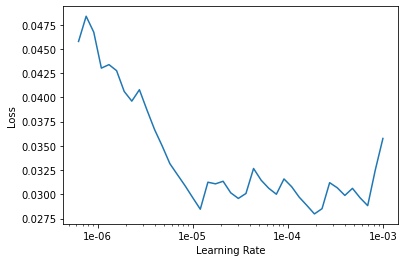

In [26]:
learn_resnet34.lr_find()
learn_resnet34.recorder.plot()

In [27]:
learn_resnet34.fit_one_cycle(5, slice(1e-06, learn_rate/5))

In [28]:
learn_resnet34.save('stage-2-rn34')

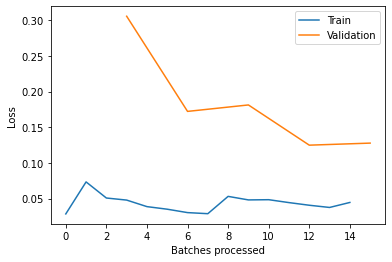

In [29]:
learn_resnet34.unfreeze()
learn_resnet34.recorder.plot_losses()

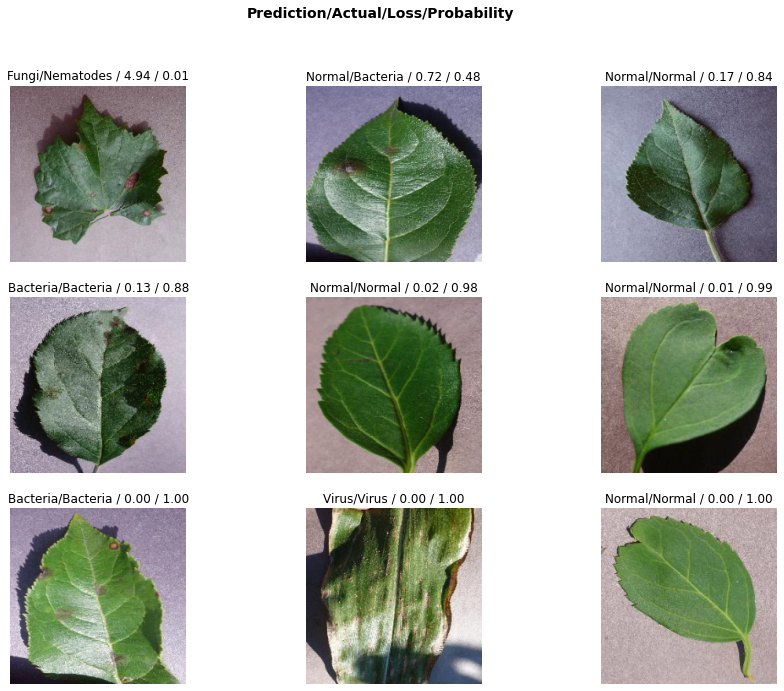

In [30]:
interp = ClassificationInterpretation.from_learner(learn_resnet34)
interp.plot_top_losses(9, figsize=(15,11))

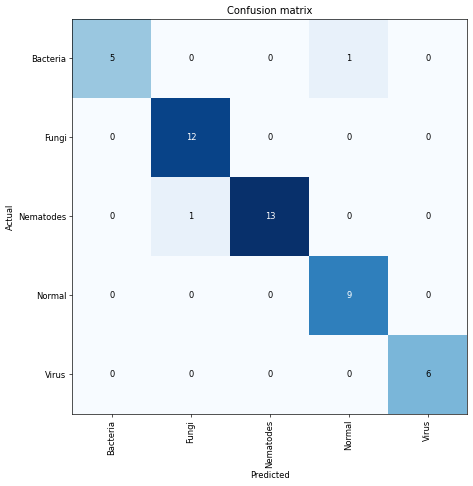

In [31]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

> RESNET101

In [32]:
learn_resnet101 = cnn_learner(data, models.resnet101, metrics=[accuracy, error_rate], model_dir="/temp/model/")

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


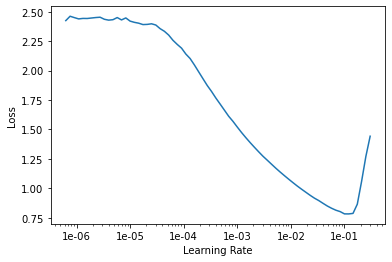

In [33]:
learn_resnet101.lr_find()
learn_resnet101.recorder.plot()

In [34]:
learn_resnet101_rate = 1e-02
learn_resnet101.fit_one_cycle(5, slice(learn_rate))

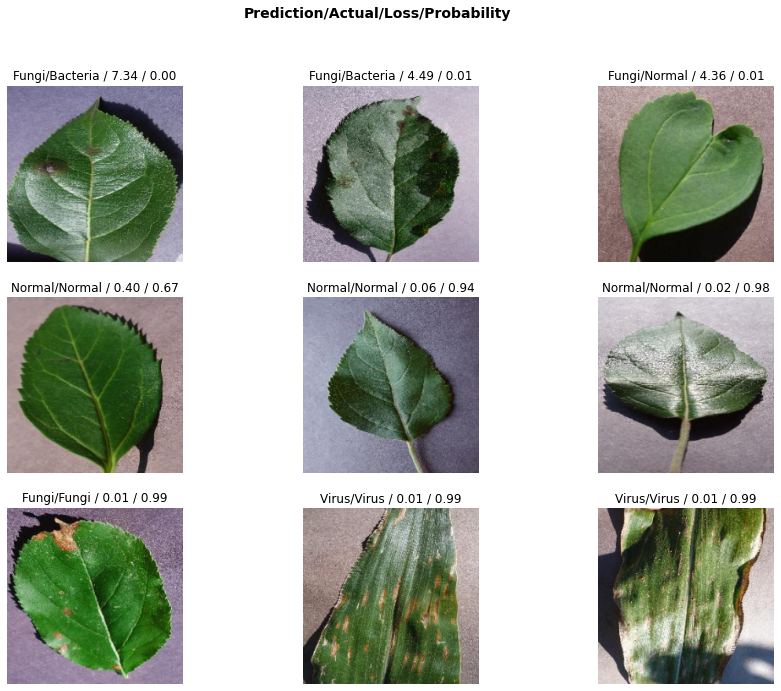

In [35]:
interp = ClassificationInterpretation.from_learner(learn_resnet101)
interp.plot_top_losses(9, figsize=(15,11))

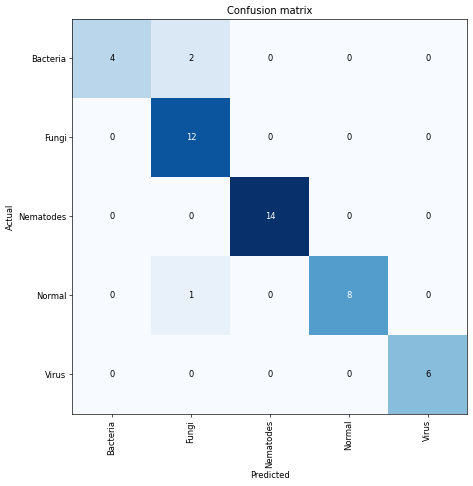

In [36]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [37]:
learn_resnet101.save('stage-1-rn101')

In [38]:
learn_resnet101.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


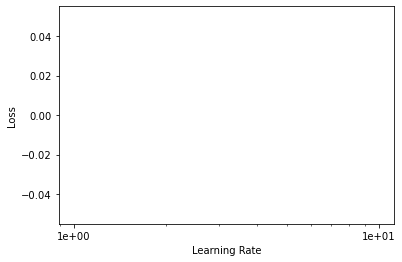

In [39]:
learn_resnet101.lr_find()
learn_resnet101.recorder.plot()

In [40]:
learn_resnet101.fit_one_cycle(5, slice(1e-06, learn_rate/5))

In [41]:
learn_resnet101.save('stage-2-rn101')

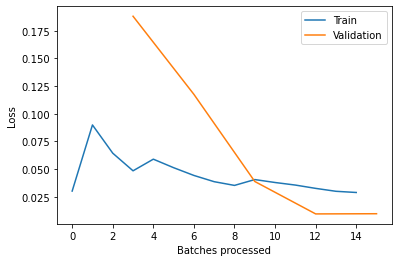

In [42]:
learn_resnet101.unfreeze()
learn_resnet101.recorder.plot_losses()

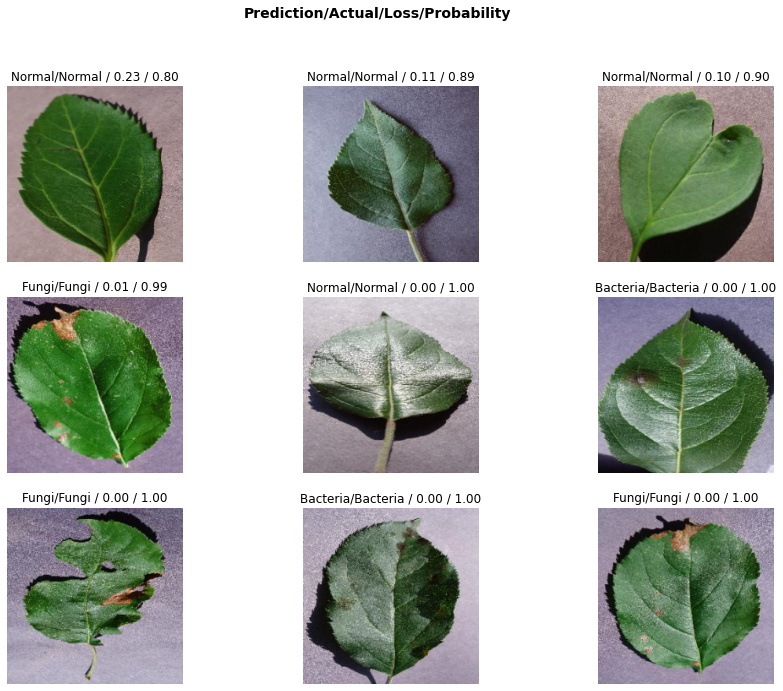

In [43]:
interp = ClassificationInterpretation.from_learner(learn_resnet101)
interp.plot_top_losses(9, figsize=(15,11))

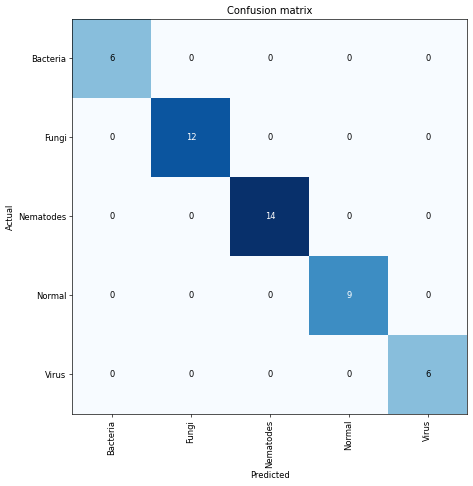

In [44]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)